# 20878 - COMPUTER VISION AND IMAGE PROCESSING

---

## Feedforward Neural Networks

<img src="https://drive.google.com/uc?export=view&id=1MnEfJWqfX_yxIQroqZ6gh6adbSMeX91G" width="500"/>

In [1]:
!pip install ultralytics opencv-python cvzone matplotlib


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.5 MB/s eta 0:00:00
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha

In [3]:
import torch
torch.cuda.is_available()


True

### 🌐 Connect Colab to Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import display, clear_output
import math
import time
import yaml

Mounted at /content/drive
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### ⚙️ Import Libraries

In [5]:
BASE_DIR = '/content/drive/MyDrive/cards'

# Define paths
DATA_YAML_PATH = os.path.join(BASE_DIR, 'absolute_data.yaml')
OUTPUT_DIR = os.path.join(BASE_DIR, 'models')
# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [9]:
# Run this code cell to update your data.yaml file for Google Colab
# Make sure Google Drive is mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Path to your original YAML file
original_yaml_path = '/content/drive/MyDrive/cards/absolute_data.yaml'

# Load the YAML file
with open(original_yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Update the paths to match your Google Drive structure
data['train'] = '/content/drive/MyDrive/cards/dataset/train/images'
data['val'] = '/content/drive/MyDrive/cards/dataset/valid/images'
data['test'] = '/content/drive/MyDrive/cards/dataset/test/images'

# Create a new YAML file
updated_yaml_path = '/content/drive/MyDrive/cards/colab_data.yaml'
with open(updated_yaml_path, 'w') as f:
    yaml.dump(data, f, default_flow_style=False)

print(f"Updated YAML file created at: {updated_yaml_path}")
print("New paths:")
print(f"Train: {data['train']}")
print(f"Validation: {data['val']}")
print(f"Test: {data['test']}")

Updated YAML file created at: /content/drive/MyDrive/cards/colab_data.yaml
New paths:
Train: /content/drive/MyDrive/cards/dataset/train/images
Validation: /content/drive/MyDrive/cards/dataset/valid/images
Test: /content/drive/MyDrive/cards/dataset/test/images


### ⏳ Load Data

In [10]:
from ultralytics import YOLO
import os

# Path to the updated data YAML file
data_path = '/content/drive/MyDrive/cards/colab_data.yaml'

# Path for saving results
project_dir = '/content/drive/MyDrive/cards/models'

# Create models directory if it doesn't exist
os.makedirs(project_dir, exist_ok=True)

# Initialize model
model_size = 'n'  # Can be 'n', 's', 'm', 'l', or 'x'
model = YOLO(f'yolov8{model_size}.pt')

# Train the model
print(f"Training with data config: {data_path}")
results = model.train(
    data=data_path,
    epochs=50,
    imgsz=640,
    batch=16,
    project=project_dir,
    name='card_detection'
)

# Print information about the training results
print(f"Training completed. Results saved to {results.save_dir}")
print(f"Best model saved as {os.path.join(results.save_dir, 'weights', 'best.pt')}")

Training with data config: /content/drive/MyDrive/cards/colab_data.yaml
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/cards/colab_data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/cards/models, name=card_detection2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed

100%|██████████| 755k/755k [00:00<00:00, 79.3MB/s]


Overriding model.yaml nc=80 with nc=52

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 271MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/cards/dataset/train/labels... 964 images, 0 backgrounds, 0 corrupt: 100%|██████████| 964/964 [13:49<00:00,  1.16it/s]


train: New cache created: /content/drive/MyDrive/cards/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/cards/dataset/valid/labels... 193 images, 0 backgrounds, 0 corrupt: 100%|██████████| 193/193 [02:41<00:00,  1.20it/s]

val: New cache created: /content/drive/MyDrive/cards/dataset/valid/labels.cache


Plotting labels to /content/drive/MyDrive/cards/models/card_detection2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/cards/models/card_detection2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.28G     0.8377      4.453      1.166         30        640: 100%|██████████| 61/61 [00:26<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        193        820    0.00878    0.00354    0.00549    0.00537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.48G     0.6832      3.979      1.053         22        640: 100%|██████████| 61/61 [00:23<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


                   all        193        820     0.0275      0.825     0.0672     0.0604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.48G     0.6898      3.549      1.083         33        640: 100%|██████████| 61/61 [00:23<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


                   all        193        820      0.182      0.272       0.13      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.48G     0.7101      3.129      1.115         27        640: 100%|██████████| 61/61 [00:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all        193        820      0.241      0.433      0.234      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.49G     0.7245      2.751      1.147         47        640: 100%|██████████| 61/61 [00:22<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


                   all        193        820      0.258      0.577      0.352      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.49G     0.7104      2.445      1.157         38        640: 100%|██████████| 61/61 [00:23<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]


                   all        193        820      0.347      0.653      0.479       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.5G     0.6958      2.261      1.146         34        640: 100%|██████████| 61/61 [00:23<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]


                   all        193        820       0.43      0.685      0.565      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.5G     0.6652      2.081      1.111         25        640: 100%|██████████| 61/61 [00:22<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


                   all        193        820      0.497      0.735      0.645      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.5G     0.6556      1.934      1.105         34        640: 100%|██████████| 61/61 [00:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]


                   all        193        820      0.559      0.806      0.736      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.5G     0.6508      1.805        1.1         37        640: 100%|██████████| 61/61 [00:25<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]


                   all        193        820      0.713      0.784      0.817      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.5G      0.645      1.698      1.094         26        640: 100%|██████████| 61/61 [00:24<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        193        820      0.699      0.831      0.855      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.5G     0.6339      1.566      1.079         40        640: 100%|██████████| 61/61 [00:24<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]


                   all        193        820      0.753      0.824      0.866      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.5G      0.617      1.472       1.07         46        640: 100%|██████████| 61/61 [00:24<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


                   all        193        820      0.768      0.879      0.915      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.51G     0.6037      1.347      1.058         39        640: 100%|██████████| 61/61 [00:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        193        820       0.81       0.88      0.919      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.51G     0.5984       1.31      1.059         54        640: 100%|██████████| 61/61 [00:24<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


                   all        193        820      0.867      0.894      0.942      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.51G     0.5893      1.237      1.043         31        640: 100%|██████████| 61/61 [00:24<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]


                   all        193        820      0.808      0.918      0.939      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.53G     0.5753      1.187      1.033         32        640: 100%|██████████| 61/61 [00:24<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]


                   all        193        820      0.898      0.905      0.956      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.53G     0.5711       1.14      1.035         40        640: 100%|██████████| 61/61 [00:24<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]


                   all        193        820      0.903      0.902      0.959      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.55G     0.5676      1.087      1.023         39        640: 100%|██████████| 61/61 [00:25<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]


                   all        193        820      0.934      0.914      0.966      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.55G     0.5819      1.069      1.039         27        640: 100%|██████████| 61/61 [00:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]


                   all        193        820      0.905      0.913      0.966      0.868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.55G     0.5598      1.028      1.019         41        640: 100%|██████████| 61/61 [00:23<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


                   all        193        820       0.93      0.941      0.976      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.55G     0.5611      1.008      1.023         33        640: 100%|██████████| 61/61 [00:27<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]


                   all        193        820      0.944      0.942      0.978       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.55G     0.5564     0.9641      1.026         51        640: 100%|██████████| 61/61 [00:23<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]


                   all        193        820      0.917      0.957      0.978      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.55G     0.5577     0.9532      1.018         32        640: 100%|██████████| 61/61 [00:26<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        193        820      0.953      0.947       0.98      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.57G     0.5418     0.9316      1.005         26        640: 100%|██████████| 61/61 [00:25<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]


                   all        193        820      0.955      0.946      0.984      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.58G     0.5489     0.8899      1.015         30        640: 100%|██████████| 61/61 [00:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        193        820      0.958      0.955      0.983      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.58G     0.5586     0.8939       1.02         38        640: 100%|██████████| 61/61 [00:24<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]


                   all        193        820      0.944      0.952      0.981      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.58G     0.5407     0.8848      1.009         36        640: 100%|██████████| 61/61 [00:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        193        820      0.955      0.953      0.985      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.6G     0.5375     0.8555          1         49        640: 100%|██████████| 61/61 [00:25<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


                   all        193        820      0.969      0.961      0.987      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.6G      0.538     0.8546      1.002         35        640: 100%|██████████| 61/61 [00:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


                   all        193        820      0.972      0.954      0.985      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.62G     0.5423     0.8527      1.008         28        640: 100%|██████████| 61/61 [00:22<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        193        820      0.967      0.968      0.987       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.62G     0.5393      0.823      1.008         37        640: 100%|██████████| 61/61 [00:22<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


                   all        193        820      0.967      0.964      0.988      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.62G     0.5295     0.8091     0.9988         44        640: 100%|██████████| 61/61 [00:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]


                   all        193        820      0.974      0.959      0.987      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.62G     0.5335     0.8021     0.9989         45        640: 100%|██████████| 61/61 [00:22<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]


                   all        193        820      0.965       0.96      0.988      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.62G     0.5296     0.7999      0.994         44        640: 100%|██████████| 61/61 [00:23<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]


                   all        193        820      0.955      0.976      0.989      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.62G     0.5205     0.7804     0.9953         22        640: 100%|██████████| 61/61 [00:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


                   all        193        820      0.972      0.966      0.989      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.62G     0.5176     0.7724     0.9937         29        640: 100%|██████████| 61/61 [00:24<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


                   all        193        820      0.979      0.965      0.989      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.62G     0.5293      0.796     0.9992         40        640: 100%|██████████| 61/61 [00:24<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]


                   all        193        820      0.964      0.975      0.988      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.62G      0.522      0.764     0.9886         41        640: 100%|██████████| 61/61 [00:25<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]


                   all        193        820      0.977      0.965       0.99      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.62G     0.5186     0.7744     0.9915         49        640: 100%|██████████| 61/61 [00:23<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        193        820      0.971      0.969      0.988      0.895


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.62G     0.4551     0.7031     0.9691         15        640: 100%|██████████| 61/61 [00:25<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        193        820      0.971      0.966      0.987      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.62G     0.4438     0.6408     0.9622         17        640: 100%|██████████| 61/61 [00:22<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]


                   all        193        820      0.974      0.969      0.989      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.62G      0.437     0.6284     0.9571         16        640: 100%|██████████| 61/61 [00:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]


                   all        193        820      0.972      0.972      0.989      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.62G     0.4327     0.6097     0.9511         17        640: 100%|██████████| 61/61 [00:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        193        820      0.977      0.966       0.99      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.62G     0.4287      0.598     0.9454         18        640: 100%|██████████| 61/61 [00:23<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]


                   all        193        820      0.973      0.966      0.989      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.62G     0.4303     0.5982     0.9572         16        640: 100%|██████████| 61/61 [00:23<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]


                   all        193        820      0.979      0.972      0.989      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.62G     0.4278     0.5951     0.9499         18        640: 100%|██████████| 61/61 [00:22<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


                   all        193        820      0.977      0.969      0.989      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.62G     0.4247     0.5876     0.9497         18        640: 100%|██████████| 61/61 [00:21<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


                   all        193        820      0.981      0.966      0.989      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.62G     0.4224     0.5852     0.9451         17        640: 100%|██████████| 61/61 [00:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]


                   all        193        820      0.978      0.966      0.989      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.62G     0.4252     0.5865     0.9506         17        640: 100%|██████████| 61/61 [00:21<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        193        820       0.98      0.966      0.989      0.898



50 epochs completed in 0.388 hours.
Optimizer stripped from /content/drive/MyDrive/cards/models/card_detection2/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/cards/models/card_detection2/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/cards/models/card_detection2/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,015,788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]


                   all        193        820      0.977      0.965       0.99      0.899
                    2C         17         17      0.987          1      0.995       0.88
                    2D         15         15          1       0.93      0.995      0.891
                    2H         18         18          1      0.932      0.992       0.96
                    2S         16         16          1      0.967      0.995      0.888
                    3C         17         17          1      0.861      0.995      0.873
                    3D         15         15          1      0.969      0.995       0.83
                    3H         18         18       0.87      0.889      0.966      0.871
                    3S         16         16      0.998          1      0.995      0.968
                    4C         17         17      0.986          1      0.995       0.89
                    4D         15         15      0.998          1      0.995      0.782
                    4

### 🔎 Inspect Data

Running evaluation on the test set...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,015,788 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/cards/dataset/test/labels.cache... 128 images, 0 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


                   all        128        543      0.962      0.963      0.987      0.901
                    2C         11         11      0.977          1      0.995       0.87
                    2D         10         10          1      0.924      0.995      0.873
                    2H         12         12      0.971          1      0.995      0.964
                    2S         10         10      0.983          1      0.995      0.878
                    3C         11         11      0.944          1      0.995      0.863
                    3D         10         10          1      0.763      0.995      0.743
                    3H         12         12      0.917      0.916       0.97      0.918
                    3S         10         10       0.97          1      0.995      0.915
                    4C         11         11      0.973          1      0.995       0.88
                    4D         10         10      0.976        0.9      0.935      0.785
                    4

  0%|          | 0/128 [00:00<?, ?it/s]


0: 480x640 1 6D, 1 7S, 1 8S, 1 9S, 57.9ms
Speed: 4.7ms preprocess, 57.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


  1%|          | 1/128 [00:00<00:15,  8.12it/s]


0: 480x640 1 6D, 1 7S, 1 8S, 1 9S, 14.8ms
Speed: 4.1ms preprocess, 14.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 4H, 1 QC, 14.3ms
Speed: 5.0ms preprocess, 14.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2H, 1 JC, 1 KC, 1 AC, 12.8ms
Speed: 4.1ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


  3%|▎         | 4/128 [00:00<00:07, 17.71it/s]


0: 480x640 1 2H, 1 JC, 2 KCs, 1 AC, 14.3ms
Speed: 4.8ms preprocess, 14.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2H, 1 JC, 1 KC, 2 ACs, 11.8ms
Speed: 4.0ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6C, 1 7H, 1 8H, 1 9H, 15.3ms
Speed: 4.1ms preprocess, 15.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


  5%|▌         | 7/128 [00:00<00:05, 20.80it/s]


0: 480x640 1 2H, 1 JC, 1 KC, 2 ACs, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2S, 1 3S, 1 4S, 1 JD, 10.1ms
Speed: 4.3ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6D, 1 7S, 1 8S, 2 9Ss, 10.7ms
Speed: 4.3ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


  8%|▊         | 10/128 [00:00<00:05, 21.91it/s]


0: 480x640 1 2C, 1 10H, 1 QD, 1 QS, 1 KD, 1 KH, 10.9ms
Speed: 4.0ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2S, 1 3S, 1 4S, 1 JD, 12.4ms
Speed: 4.3ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3D, 1 4D, 1 5D, 1 JS, 12.3ms
Speed: 4.0ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


 10%|█         | 13/128 [00:00<00:04, 23.65it/s]


0: 480x640 1 2H, 1 JC, 1 KC, 2 ACs, 13.0ms
Speed: 4.6ms preprocess, 13.0ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6H, 1 8C, 1 9C, 1 10C, 12.2ms
Speed: 4.9ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2S, 1 3S, 1 4S, 1 JD, 12.2ms
Speed: 4.0ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


 12%|█▎        | 16/128 [00:00<00:04, 23.04it/s]


0: 480x640 1 2D, 1 10S, 1 QS, 1 KS, 1 AS, 9.3ms
Speed: 4.3ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 5S, 2 8Ds, 1 9D, 15.4ms
Speed: 5.7ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2S, 1 3S, 1 4S, 1 JD, 14.0ms
Speed: 7.3ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


 15%|█▍        | 19/128 [00:00<00:04, 22.96it/s]


0: 480x640 1 3D, 1 4D, 1 5D, 1 JS, 11.9ms
Speed: 4.7ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3C, 1 4C, 1 5C, 1 JH, 14.7ms
Speed: 3.4ms preprocess, 14.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6H, 2 8Cs, 1 9C, 1 10C, 12.4ms
Speed: 4.3ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


 17%|█▋        | 22/128 [00:00<00:04, 23.65it/s]


0: 480x640 1 2C, 1 10H, 1 QH, 1 KD, 1 KH, 11.9ms
Speed: 4.0ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3D, 1 4D, 1 5D, 1 JS, 11.3ms
Speed: 3.4ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3C, 1 4C, 1 5C, 1 JH, 13.8ms
Speed: 3.7ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


 20%|█▉        | 25/128 [00:01<00:04, 24.61it/s]


0: 480x640 1 3C, 1 4C, 1 5C, 1 JH, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 7C, 1 10D, 1 QD, 3 KDs, 7.0ms
Speed: 3.4ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2C, 1 10H, 1 QS, 1 KH, 1 AH, 7.7ms
Speed: 4.0ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 7C, 1 10D, 1 QD, 2 KDs, 6.7ms
Speed: 3.4ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 23%|██▎       | 29/128 [00:01<00:03, 28.21it/s]


0: 480x640 1 6D, 1 7S, 1 8S, 1 9S, 6.7ms
Speed: 3.1ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 5S, 1 7D, 3 8Ds, 1 9D, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 3Cs, 1 4C, 1 5C, 1 JH, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2D, 1 10S, 2 QSs, 1 KS, 1 AS, 7.2ms
Speed: 3.4ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 26%|██▌       | 33/128 [00:01<00:03, 31.15it/s]


0: 480x640 2 3Cs, 1 4C, 7.0ms
Speed: 3.7ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 7C, 1 10D, 1 QD, 2 KDs, 1 AD, 8.8ms
Speed: 3.6ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6D, 1 7S, 1 8S, 1 9S, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3C, 1 4C, 1 5C, 1 JH, 7.2ms
Speed: 3.5ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 29%|██▉       | 37/128 [00:01<00:02, 32.88it/s]


0: 480x640 1 7C, 1 10D, 3 KDs, 9.0ms
Speed: 3.6ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2S, 1 4S, 1 8D, 1 JD, 7.1ms
Speed: 3.9ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 3Hs, 1 4H, 1 5H, 2 QCs, 6.8ms
Speed: 3.2ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2C, 1 10H, 1 QH, 1 KD, 1 KH, 1 AH, 6.7ms
Speed: 3.1ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 32%|███▏      | 41/128 [00:01<00:02, 34.48it/s]


0: 480x640 1 2H, 1 JC, 2 KCs, 2 ACs, 6.6ms
Speed: 3.1ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 10S, 1 QS, 1 KS, 1 AS, 6.8ms
Speed: 3.3ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 7C, 1 10D, 2 QDs, 1 KD, 6.9ms
Speed: 3.1ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2C, 1 10H, 1 QH, 1 KH, 1 AH, 7.5ms
Speed: 3.0ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▌      | 45/128 [00:01<00:02, 35.87it/s]


0: 480x640 1 3H, 1 4H, 1 5H, 1 QC, 6.4ms
Speed: 2.9ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 7Ds, 1 8D, 1 9D, 6.7ms
Speed: 3.4ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6C, 1 7H, 1 8H, 1 9H, 6.7ms
Speed: 3.6ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 7C, 1 10D, 1 QD, 1 KD, 1 AD, 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3H, 1 4H, 1 5H, 1 QC, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 39%|███▉      | 50/128 [00:01<00:02, 37.77it/s]


0: 480x640 1 3C, 1 4C, 1 5C, 1 JH, 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 4H, 1 5H, 1 QC, 7.0ms
Speed: 3.4ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2C, 1 10H, 2 QHs, 6.5ms
Speed: 3.1ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 5S, 1 7D, 1 8D, 1 9D, 6.8ms
Speed: 3.2ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 42%|████▏     | 54/128 [00:01<00:01, 37.90it/s]


0: 480x640 1 5S, 1 7D, 2 8Ds, 1 9D, 11.4ms
Speed: 3.5ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6H, 1 8C, 1 9C, 1 10C, 7.6ms
Speed: 3.4ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6C, 1 7H, 1 8H, 1 9H, 7.1ms
Speed: 3.2ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6D, 1 7S, 1 8S, 1 9S, 7.2ms
Speed: 3.4ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 45%|████▌     | 58/128 [00:01<00:01, 35.74it/s]


0: 480x640 1 3H, 1 4H, 1 5H, 1 QC, 8.3ms
Speed: 4.2ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6C, 2 7Hs, 1 8H, 1 9H, 7.2ms
Speed: 3.6ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 7C, 1 10D, 1 QD, 3 KDs, 7.2ms
Speed: 3.7ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3C, 1 4C, 1 5C, 1 JH, 7.3ms
Speed: 3.6ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 48%|████▊     | 62/128 [00:02<00:01, 35.82it/s]


0: 480x640 1 5S, 2 7Ds, 1 8D, 2 9Ds, 6.9ms
Speed: 3.6ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 6Hs, 1 8C, 1 10C, 6.8ms
Speed: 3.5ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3C, 1 4C, 1 5C, 1 JH, 6.9ms
Speed: 3.6ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2C, 1 10H, 1 QH, 1 KH, 1 AH, 8.0ms
Speed: 3.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 52%|█████▏    | 66/128 [00:02<00:01, 36.42it/s]


0: 480x640 1 6D, 1 7S, 1 8S, 1 9S, 10.1ms
Speed: 3.3ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3D, 1 4D, 1 5D, 1 JS, 6.9ms
Speed: 3.3ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3D, 1 4D, 1 5D, 1 JS, 7.4ms
Speed: 3.7ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 8C, 1 9C, 1 10C, 6.5ms
Speed: 3.0ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 55%|█████▍    | 70/128 [00:02<00:01, 36.52it/s]


0: 480x640 2 7Cs, 1 QD, 1 KC, 2 KDs, 6.8ms
Speed: 3.6ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2H, 1 JC, 1 KC, 2 ACs, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 7Ds, 1 8D, 1 9D, 7.1ms
Speed: 3.7ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3D, 1 4D, 1 5D, 1 JS, 6.5ms
Speed: 3.5ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 58%|█████▊    | 74/128 [00:02<00:01, 36.88it/s]


0: 480x640 1 5S, 3 8Ds, 1 9D, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2S, 1 3S, 1 JD, 8.8ms
Speed: 3.5ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6C, 1 7H, 2 8Hs, 1 9H, 7.0ms
Speed: 3.4ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 10H, 2 QHs, 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 61%|██████    | 78/128 [00:02<00:01, 37.49it/s]


0: 480x640 1 7C, 1 10D, 1 QD, 2 KDs, 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2H, 1 JC, 1 KC, 2 ACs, 8.4ms
Speed: 3.1ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3D, 1 4D, 1 5D, 1 JS, 7.2ms
Speed: 3.3ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3H, 1 4H, 1 5H, 1 QC, 6.8ms
Speed: 3.1ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 64%|██████▍   | 82/128 [00:02<00:01, 38.09it/s]


0: 480x640 1 2S, 2 3Ss, 1 4S, 1 JD, 6.5ms
Speed: 3.6ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3H, 1 4H, 1 5H, 1 QC, 7.3ms
Speed: 3.4ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2C, 1 10H, 1 QS, 1 KH, 1 AH, 7.5ms
Speed: 3.6ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6H, 2 8Cs, 1 9C, 1 10C, 7.2ms
Speed: 3.5ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 67%|██████▋   | 86/128 [00:02<00:01, 37.89it/s]


0: 480x640 1 2D, 1 10S, 1 QS, 1 KH, 1 KS, 1 AS, 7.1ms
Speed: 3.1ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 7C, 1 10D, 1 QD, 2 KDs, 7.3ms
Speed: 3.7ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6C, 1 7H, 1 8H, 1 9H, 8.4ms
Speed: 3.3ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2H, 1 JC, 2 KCs, 1 AC, 8.5ms
Speed: 3.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 70%|███████   | 90/128 [00:02<00:01, 37.32it/s]


0: 480x640 1 2S, 2 3Ss, 1 4S, 7.1ms
Speed: 3.7ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2D, 1 2H, 1 10S, 1 QS, 1 KC, 1 KS, 1 AS, 7.1ms
Speed: 3.8ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2D, 1 10S, 2 QSs, 1 KS, 1 AS, 12.9ms
Speed: 3.8ms preprocess, 12.9ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6C, 1 7H, 1 8H, 1 9H, 7.6ms
Speed: 3.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 73%|███████▎  | 94/128 [00:02<00:00, 35.95it/s]


0: 480x640 1 6D, 1 7S, 1 8S, 1 9S, 6.9ms
Speed: 3.3ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6H, 1 8C, 2 9Cs, 1 10C, 7.1ms
Speed: 3.5ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6C, 1 7H, 3 8Hs, 7.2ms
Speed: 3.8ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6C, 1 7H, 2 8Hs, 7.0ms
Speed: 3.7ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 77%|███████▋  | 98/128 [00:03<00:00, 34.54it/s]


0: 480x640 1 3D, 1 4D, 1 5D, 1 JS, 6.9ms
Speed: 3.3ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3H, 1 4H, 1 5H, 1 QC, 9.1ms
Speed: 3.7ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2D, 1 10S, 1 QS, 1 KS, 1 AS, 7.4ms
Speed: 3.7ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3D, 1 4D, 2 5Ds, 1 JS, 7.1ms
Speed: 3.6ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 80%|███████▉  | 102/128 [00:03<00:00, 35.13it/s]


0: 480x640 1 6H, 1 8C, 1 9C, 1 10C, 7.9ms
Speed: 4.3ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2S, 2 3Ss, 1 4S, 1 JD, 6.8ms
Speed: 3.4ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2D, 1 10S, 1 QS, 1 KS, 1 AS, 7.4ms
Speed: 3.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6H, 1 8C, 1 9C, 1 10C, 6.7ms
Speed: 3.7ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 83%|████████▎ | 106/128 [00:03<00:00, 35.93it/s]


0: 480x640 1 2H, 1 JC, 1 KC, 1 AC, 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6H, 1 8C, 1 9C, 2 10Cs, 6.7ms
Speed: 3.7ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6D, 1 7S, 1 8S, 1 9S, 7.3ms
Speed: 3.7ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 3Hs, 1 4H, 1 5H, 1 QC, 7.5ms
Speed: 3.8ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 86%|████████▌ | 110/128 [00:03<00:00, 36.50it/s]


0: 480x640 1 3H, 1 4H, 1 5H, 1 QC, 7.1ms
Speed: 3.6ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 5S, 1 7D, 1 8D, 1 9D, 7.2ms
Speed: 3.3ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3H, 1 4H, 1 5H, 1 QC, 10.3ms
Speed: 4.4ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2C, 1 10H, 1 QH, 1 QS, 1 KH, 1 AH, 1 AS, 7.2ms
Speed: 3.3ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 89%|████████▉ | 114/128 [00:03<00:00, 36.41it/s]


0: 480x640 1 3C, 1 4C, 1 5C, 1 JH, 6.7ms
Speed: 3.6ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3C, 2 4Cs, 1 5C, 8.6ms
Speed: 3.5ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6D, 1 7S, 1 8S, 1 9S, 7.0ms
Speed: 3.5ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2D, 1 10S, 1 QS, 1 KS, 1 AS, 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 92%|█████████▏| 118/128 [00:03<00:00, 36.66it/s]


0: 480x640 1 5S, 1 7D, 1 8D, 1 9D, 6.8ms
Speed: 3.3ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2H, 1 JC, 1 KC, 3 ACs, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2C, 1 10H, 1 QS, 1 KD, 6.6ms
Speed: 3.7ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2S, 2 3Ss, 1 4S, 7.0ms
Speed: 3.8ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 95%|█████████▌| 122/128 [00:03<00:00, 37.40it/s]


0: 480x640 1 6C, 2 7Hs, 1 8H, 1 9H, 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2D, 1 10S, 1 QS, 1 KS, 1 AS, 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 6H, 1 8C, 1 9C, 1 10C, 7.0ms
Speed: 3.5ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 2H, 1 JC, 1 AC, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 98%|█████████▊| 126/128 [00:03<00:00, 37.63it/s]


0: 480x640 1 6C, 1 7H, 2 8Hs, 1 9H, 6.7ms
Speed: 3.2ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 3D, 1 4D, 1 5D, 1 JS, 6.4ms
Speed: 3.7ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


100%|██████████| 128/128 [00:03<00:00, 33.04it/s]


Detection Statistics by Card Class:
   class  count  avg_conf  min_conf  max_conf
44    KD     25  0.851544  0.433099  0.991759
35    AC     20  0.710567  0.340189  0.998641
28    8D     17  0.827122  0.279368  0.995602
50    QS     17  0.763561  0.333591  0.976875
43    KC     16  0.667315  0.265907  0.943943
29    8H     16  0.804629  0.415607  0.979249
25    7H     13  0.799803  0.285822  0.965385
27    8C     13  0.855007  0.401960  0.986221
11    3S     13  0.800678  0.250419  0.982648
8     3C     13  0.791840  0.252823  0.989393
47    QC     13  0.934344  0.516783  0.988344
6     2H     13  0.938782  0.622164  0.991103
12    4C     12  0.936012  0.792343  0.971692
0    10C     12  0.903854  0.323049  0.992501
14    4H     12  0.931471  0.665862  0.994171
39    JC     12  0.955106  0.849611  0.994928
10    3H     12  0.866857  0.449136  0.993323
18    5H     11  0.937749  0.627981  0.987545
2    10H     11  0.799694  0.473704  0.959716
38    AS     11  0.661453  0.377208  0.9467

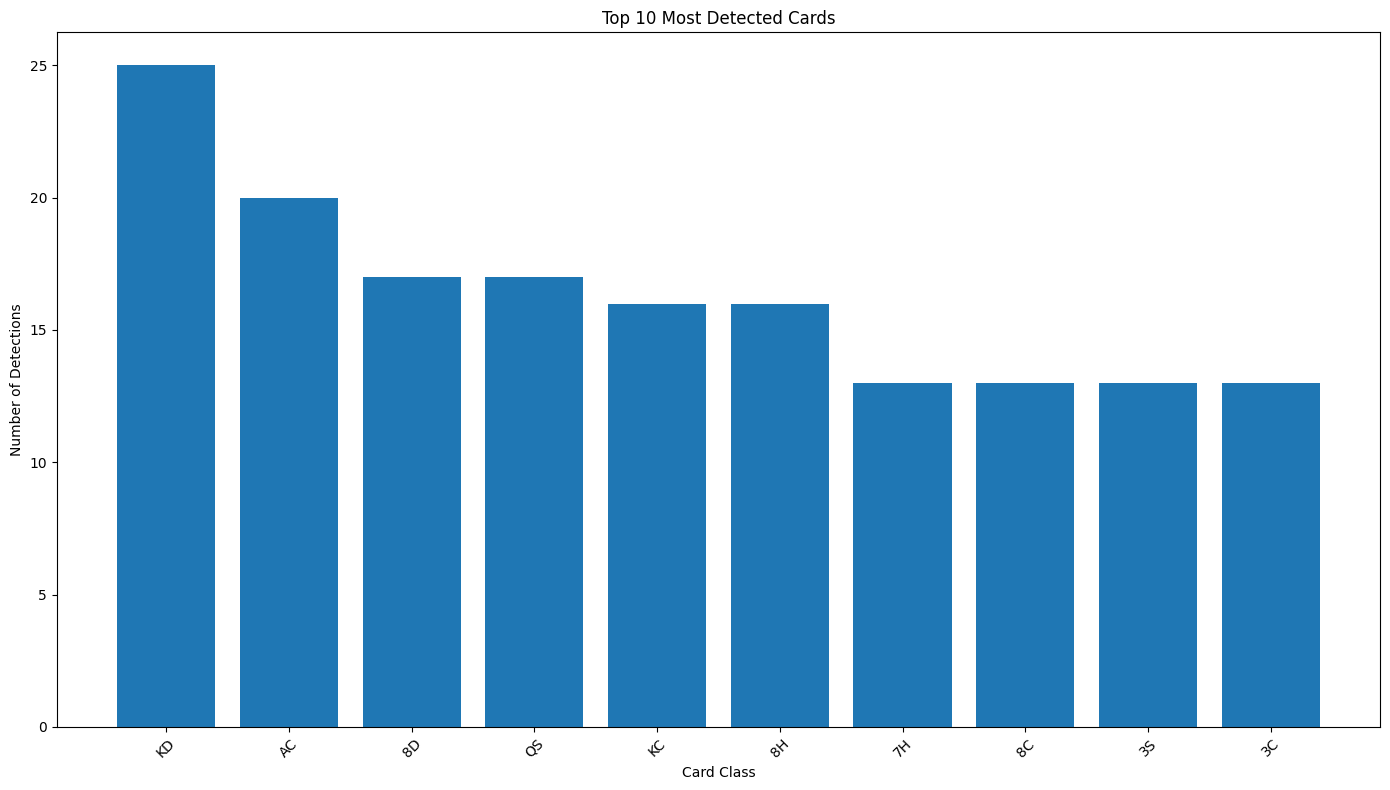

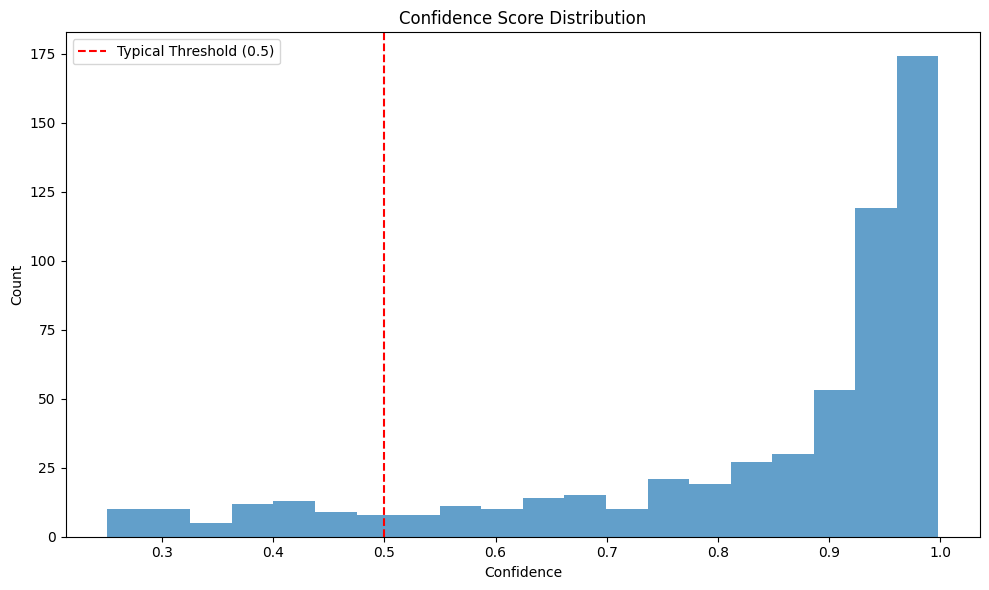

In [13]:
# Run this cell to evaluate your model on the test set
import pandas as pd
from tqdm import tqdm

# Path to your trained model
model_path = '/content/drive/MyDrive/cards/models/card_detection2/weights/best.pt'

# Path to test images (from your updated YAML file)
test_images_path = '/content/drive/MyDrive/cards/dataset/test/images'

# Load the model
model = YOLO(model_path)

# Evaluate the model on the test set
print("Running evaluation on the test set...")
test_results = model.val(data='/content/drive/MyDrive/cards/colab_data.yaml', split='test')

# Display test metrics
print("\nTest Set Metrics:")
print(f"mAP50: {test_results.box.map50:.4f}")  # mAP at IoU=0.5
print(f"mAP50-95: {test_results.box.map:.4f}")  # mAP at IoU=0.5:0.95
print(f"Precision: {test_results.box.mp:.4f}")  # mean precision
print(f"Recall: {test_results.box.mr:.4f}")     # mean recall

# Create a more detailed analysis by class (for selected classes)
print("\nGenerating detailed per-class analysis...")

# Get list of test images
test_images = [f for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Collect predictions for analysis
all_preds = []
all_conf = []
all_class_names = []

# Process all test images
for img_name in tqdm(test_images):
    img_path = os.path.join(test_images_path, img_name)

    # Read image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run prediction
    results = model(img_rgb)

    # Extract results
    for r in results:
        for box in r.boxes:
            cls_id = int(box.cls[0])
            cls_name = model.names[cls_id]
            conf = float(box.conf[0])

            all_preds.append(cls_name)
            all_conf.append(conf)
            all_class_names.append(cls_name)

# Create a DataFrame for analysis
df = pd.DataFrame({
    'class': all_preds,
    'confidence': all_conf
})

# Group by class
class_stats = df.groupby('class').agg({
    'confidence': ['count', 'mean', 'min', 'max']
}).reset_index()

# Flatten the column names
class_stats.columns = ['class', 'count', 'avg_conf', 'min_conf', 'max_conf']

# Sort by count (descending)
class_stats = class_stats.sort_values('count', ascending=False)

# Display the table
print("\nDetection Statistics by Card Class:")
print(class_stats)

# Plot the distribution of predictions by card type
plt.figure(figsize=(14, 8))
top_classes = class_stats.head(10)['class'].values
plt.bar(top_classes, class_stats.head(10)['count'].values)
plt.title('Top 10 Most Detected Cards')
plt.xlabel('Card Class')
plt.ylabel('Number of Detections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot confidence distribution
plt.figure(figsize=(10, 6))
plt.hist(df['confidence'], bins=20, alpha=0.7)
plt.title('Confidence Score Distribution')
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.axvline(0.5, color='red', linestyle='--', label='Typical Threshold (0.5)')
plt.legend()
plt.tight_layout()
plt.show()